In [12]:
# Instalação das bibliotecas necessárias (descomente se necessário)
# !pip install pandas numpy matplotlib seaborn plotly scikit-learn

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from datetime import datetime, timedelta
import warnings
warnings.filterwarnings('ignore')

# Configuração de estilo
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

In [4]:
# 1. GERAÇÃO DE DADOS SINTÉTICOS

print("\n1. GERANDO DATASET SINTÉTICO...")

# Configurar seed para reprodutibilidade
np.random.seed(42)

# Definir período de análise
start_date = datetime(2022, 1, 1)
end_date = datetime(2023, 5, 31)
date_range = pd.date_range(start=start_date, end=end_date, freq='D')

# Categorias de produtos
categorias = ['Eletrônicos', 'Roupas', 'Casa & Jardim', 'Livros', 'Esportes',
              'Beleza', 'Brinquedos', 'Alimentação']

# Regiões do Brasil
regioes = ['Sudeste', 'Nordeste', 'Sul', 'Norte', 'Centro-Oeste']

# Gerar dados de vendas
n_vendas = 15000

dados_vendas = {
    'data_venda': np.random.choice(date_range, n_vendas),
    'categoria': np.random.choice(categorias, n_vendas,
                                 p=[0.25, 0.18, 0.15, 0.08, 0.10, 0.08, 0.08, 0.08]),
    'regiao': np.random.choice(regioes, n_vendas,
                              p=[0.42, 0.27, 0.15, 0.08, 0.08]),
    'preco': np.random.lognormal(mean=4, sigma=1, size=n_vendas).round(2),
    'quantidade': np.random.poisson(lam=2, size=n_vendas) + 1,
    'desconto': np.random.choice([0, 5, 10, 15, 20, 25], n_vendas,
                                p=[0.3, 0.2, 0.2, 0.15, 0.1, 0.05])
}

# Criar DataFrame
df = pd.DataFrame(dados_vendas)

# Calcular métricas adicionais
df['valor_total'] = df['preco'] * df['quantidade']
df['valor_desconto'] = df['valor_total'] * (df['desconto'] / 100)
df['valor_final'] = df['valor_total'] - df['valor_desconto']
df['mes_ano'] = df['data_venda'].dt.to_period('M')
df['mes'] = df['data_venda'].dt.month
df['ano'] = df['data_venda'].dt.year
df['trimestre'] = df['data_venda'].dt.quarter
df['dia_semana'] = df['data_venda'].dt.day_name()

print(f"Dataset criado com {len(df)} registros de vendas")
print(f"Período: {df['data_venda'].min().strftime('%d/%m/%Y')} a {df['data_venda'].max().strftime('%d/%m/%Y')}")


1. GERANDO DATASET SINTÉTICO...
Dataset criado com 15000 registros de vendas
Período: 01/01/2022 a 31/05/2023


In [5]:
# 2. EXPLORAÇÃO INICIAL DOS DADOS

print("\n2. EXPLORAÇÃO INICIAL DOS DADOS")

# Informações básicas
print("INFORMAÇÕES GERAIS:")
print(f"Total de vendas: {len(df):,}")
print(f"Faturamento total: R$ {df['valor_final'].sum():,.2f}")
print(f"Ticket médio: R$ {df['valor_final'].mean():.2f}")
print(f"Período analisado: {df['data_venda'].nunique()} dias")

# Estatísticas descritivas
print("\nESTATÍSTICAS DESCRITIVAS:")
print(df[['preco', 'quantidade', 'valor_final', 'desconto']].describe().round(2))

# Verificar valores ausentes
print("\n VALORES AUSENTES:")
print(df.isnull().sum())


2. EXPLORAÇÃO INICIAL DOS DADOS
INFORMAÇÕES GERAIS:
Total de vendas: 15,000
Faturamento total: R$ 3,749,668.88
Ticket médio: R$ 249.98
Período analisado: 516 dias

ESTATÍSTICAS DESCRITIVAS:
          preco  quantidade  valor_final  desconto
count  15000.00    15000.00     15000.00  15000.00
mean      91.12        3.00       249.98      8.48
std      117.59        1.41       371.39      7.61
min        1.04        1.00         2.08      0.00
25%       28.12        2.00        62.51      0.00
50%       55.01        3.00       134.13      5.00
75%      108.80        4.00       289.52     15.00
max     2383.31       11.00      8579.92     25.00

 VALORES AUSENTES:
data_venda        0
categoria         0
regiao            0
preco             0
quantidade        0
desconto          0
valor_total       0
valor_desconto    0
valor_final       0
mes_ano           0
mes               0
ano               0
trimestre         0
dia_semana        0
dtype: int64



3. GERANDO ANÁLISES E VISUALIZAÇÕES


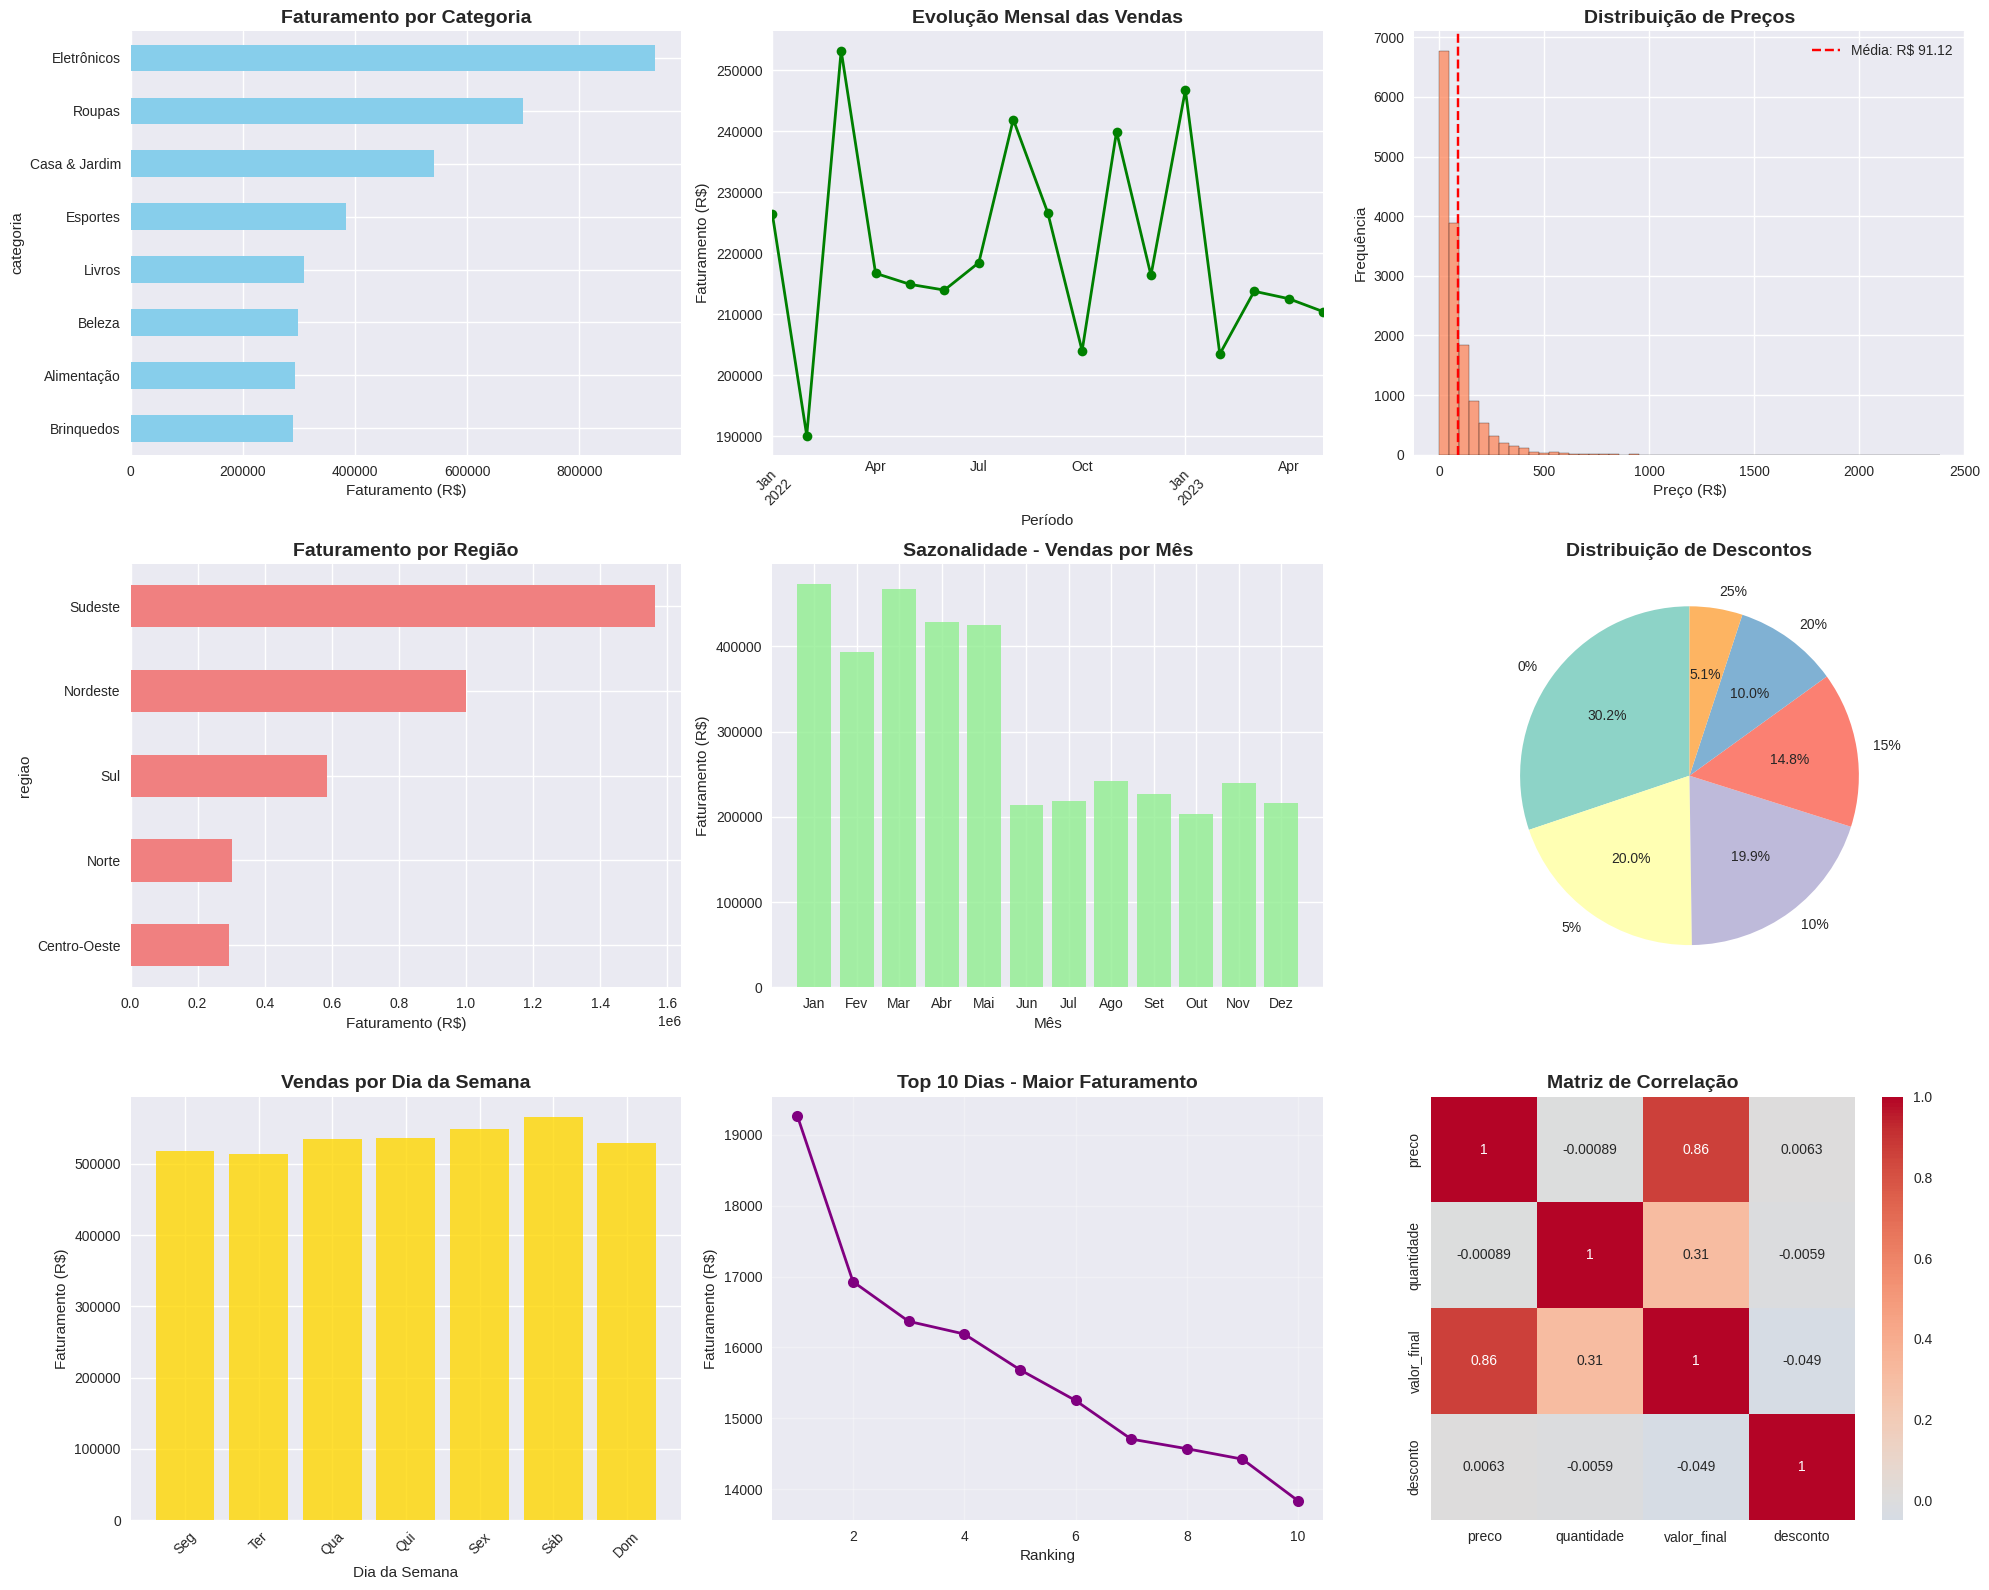

In [11]:
# 3. ANÁLISES E VISUALIZAÇÕES

print("\n3. GERANDO ANÁLISES E VISUALIZAÇÕES")

# Criar figura com subplots
fig = plt.figure(figsize=(20, 16))

# 3.1 Vendas por Categoria
plt.subplot(3, 3, 1)
vendas_categoria = df.groupby('categoria')['valor_final'].sum().sort_values(ascending=True)
vendas_categoria.plot(kind='barh', color='skyblue')
plt.title('Faturamento por Categoria', fontsize=14, fontweight='bold')
plt.xlabel('Faturamento (R$)')
plt.ticklabel_format(style='plain', axis='x')

# 3.2 Evolução temporal das vendas
plt.subplot(3, 3, 2)
vendas_mensal = df.groupby('mes_ano')['valor_final'].sum()
vendas_mensal.plot(kind='line', marker='o', color='green', linewidth=2)
plt.title('Evolução Mensal das Vendas', fontsize=14, fontweight='bold')
plt.xlabel('Período')
plt.ylabel('Faturamento (R$)')
plt.xticks(rotation=45)

# 3.3 Distribuição de preços
plt.subplot(3, 3, 3)
plt.hist(df['preco'], bins=50, alpha=0.7, color='coral', edgecolor='black')
plt.title('Distribuição de Preços', fontsize=14, fontweight='bold')
plt.xlabel('Preço (R$)')
plt.ylabel('Frequência')
plt.axvline(df['preco'].mean(), color='red', linestyle='--',
           label=f'Média: R$ {df["preco"].mean():.2f}')
plt.legend()

# 3.4 Vendas por Região
plt.subplot(3, 3, 4)
vendas_regiao = df.groupby('regiao')['valor_final'].sum().sort_values(ascending=True)
vendas_regiao.plot(kind='barh', color='lightcoral')
plt.title('Faturamento por Região', fontsize=14, fontweight='bold')
plt.xlabel('Faturamento (R$)')

# 3.5 Sazonalidade - Vendas por mês
plt.subplot(3, 3, 5)
vendas_mes = df.groupby('mes')['valor_final'].sum()
meses = ['Jan', 'Fev', 'Mar', 'Abr', 'Mai', 'Jun',
         'Jul', 'Ago', 'Set', 'Out', 'Nov', 'Dez']
plt.bar(range(1, 13), vendas_mes.values, color='lightgreen', alpha=0.8)
plt.title('Sazonalidade - Vendas por Mês', fontsize=14, fontweight='bold')
plt.xlabel('Mês')
plt.ylabel('Faturamento (R$)')
plt.xticks(range(1, 13), meses)

# 3.6 Análise de descontos
plt.subplot(3, 3, 6)
desconto_vendas = df.groupby('desconto').size()
plt.pie(desconto_vendas.values, labels=[f'{int(x)}%' for x in desconto_vendas.index],
        autopct='%1.1f%%', startangle=90, colors=plt.cm.Set3.colors)
plt.title('Distribuição de Descontos', fontsize=14, fontweight='bold')

# 3.7 Vendas por dia da semana
plt.subplot(3, 3, 7)
ordem_dias = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
vendas_dia = df.groupby('dia_semana')['valor_final'].sum().reindex(ordem_dias)
dias_pt = ['Seg', 'Ter', 'Qua', 'Qui', 'Sex', 'Sáb', 'Dom']
plt.bar(dias_pt, vendas_dia.values, color='gold', alpha=0.8)
plt.title('Vendas por Dia da Semana', fontsize=14, fontweight='bold')
plt.xlabel('Dia da Semana')
plt.ylabel('Faturamento (R$)')
plt.xticks(rotation=45)

# 3.8 Top 10 dias com maior faturamento
plt.subplot(3, 3, 8)
top_dias = df.groupby('data_venda')['valor_final'].sum().nlargest(10)
plt.plot(range(1, 11), top_dias.values, marker='o', linewidth=2, markersize=8, color='purple')
plt.title('Top 10 Dias - Maior Faturamento', fontsize=14, fontweight='bold')
plt.xlabel('Ranking')
plt.ylabel('Faturamento (R$)')
plt.grid(True, alpha=0.3)

# 3.9 Correlação entre variáveis
plt.subplot(3, 3, 9)
corr_data = df[['preco', 'quantidade', 'valor_final', 'desconto']].corr()
sns.heatmap(corr_data, annot=True, cmap='coolwarm', center=0, square=True)
plt.title('Matriz de Correlação', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.show()

In [7]:
# 4. INSIGHTS E ANÁLISES AVANÇADAS

print("\n4. INSIGHTS ")

# 4.1 Análise de Performance por Categoria
print("PERFORMANCE POR CATEGORIA:")
categoria_stats = df.groupby('categoria').agg({
    'valor_final': ['sum', 'mean', 'count'],
    'quantidade': 'sum',
    'desconto': 'mean'
}).round(2)

categoria_stats.columns = ['Faturamento_Total', 'Ticket_Medio', 'Num_Vendas',
                          'Qtd_Total', 'Desconto_Medio']
categoria_stats['Participacao_Faturamento'] = (
    categoria_stats['Faturamento_Total'] / categoria_stats['Faturamento_Total'].sum() * 100
).round(2)

print(categoria_stats.sort_values('Faturamento_Total', ascending=False))

# 4.2 Análise sazonal detalhada
print("\nANÁLISE SAZONAL POR TRIMESTRE:")
sazonal = df.groupby(['ano', 'trimestre']).agg({
    'valor_final': 'sum',
    'quantidade': 'sum'
}).round(2)
print(sazonal)

# 4.3 Análise de efetividade dos descontos
print("\nANÁLISE DE EFETIVIDADE DOS DESCONTOS:")
desconto_analise = df.groupby('desconto').agg({
    'valor_final': 'sum',
    'quantidade': 'mean',
    'preco': 'mean'
}).round(2)
desconto_analise['Vendas_Count'] = df.groupby('desconto').size()
print(desconto_analise)

# 4.4 Identificar padrões regionais
print("\nPADRÕES REGIONAIS:")
regional_analysis = df.groupby('regiao').agg({
    'valor_final': ['sum', 'mean'],
    'categoria': lambda x: x.value_counts().index[0],  # categoria mais popular
    'desconto': 'mean'
}).round(2)
print(regional_analysis)


4. INSIGHTS 
PERFORMANCE POR CATEGORIA:
               Faturamento_Total  Ticket_Medio  Num_Vendas  Qtd_Total  \
categoria                                                               
Eletrônicos            934768.58        252.85        3697      11144   
Roupas                 699307.23        252.55        2769       8368   
Casa & Jardim          540383.71        247.32        2185       6481   
Esportes               384048.13        248.57        1545       4658   
Livros                 308639.83        255.92        1206       3615   
Beleza                 298967.95        252.08        1186       3570   
Alimentação            293273.49        241.78        1213       3572   
Brinquedos             290279.96        242.10        1199       3614   

               Desconto_Medio  Participacao_Faturamento  
categoria                                                
Eletrônicos              8.46                     24.93  
Roupas                   8.34                     18.6

In [8]:
# 5. RELATÓRIO EXECUTIVO

print("RELATÓRIO EXECUTIVO - PRINCIPAIS INSIGHTS")

total_faturamento = df['valor_final'].sum()
melhor_categoria = df.groupby('categoria')['valor_final'].sum().idxmax()
melhor_regiao = df.groupby('regiao')['valor_final'].sum().idxmax()
melhor_mes = df.groupby('mes')['valor_final'].sum().idxmax()

print(f"""
RESUMO GERAL:
• Faturamento Total: R$ {total_faturamento:,.2f}
• Total de Vendas: {len(df):,} transações
• Ticket Médio: R$ {df['valor_final'].mean():.2f}
• Período Analisado: {df['data_venda'].nunique()} dias

DESTAQUES:
• Melhor Categoria: {melhor_categoria} (R$ {df[df['categoria']==melhor_categoria]['valor_final'].sum():,.2f})
• Melhor Região: {melhor_regiao} (R$ {df[df['regiao']==melhor_regiao]['valor_final'].sum():,.2f})
• Melhor Mês: {melhor_mes} (R$ {df[df['mes']==melhor_mes]['valor_final'].sum():,.2f})

INSIGHTS PRINCIPAIS:
• Eletrônicos representa {(df[df['categoria']=='Eletrônicos']['valor_final'].sum()/total_faturamento*100):.1f}% do faturamento
• Região Sudeste concentra {(df[df['regiao']=='Sudeste']['valor_final'].sum()/total_faturamento*100):.1f}% das vendas
• Desconto médio aplicado: {df['desconto'].mean():.1f}%
• Quantidade média por venda: {df['quantidade'].mean():.1f} itens

RECOMENDAÇÕES:
1. Investir mais em marketing para categoria de Eletrônicos
2. Expandir operações na região Sudeste
3. Revisar estratégia de descontos para otimizar margem
4. Focar em estratégias sazonais para os meses de pico
""")

📋 RELATÓRIO EXECUTIVO - PRINCIPAIS INSIGHTS

RESUMO GERAL:
• Faturamento Total: R$ 3,749,668.88
• Total de Vendas: 15,000 transações
• Ticket Médio: R$ 249.98
• Período Analisado: 516 dias

DESTAQUES:
• Melhor Categoria: Eletrônicos (R$ 934,768.58)
• Melhor Região: Sudeste (R$ 1,563,845.71)
• Melhor Mês: 1 (R$ 473,184.92)

INSIGHTS PRINCIPAIS:
• Eletrônicos representa 24.9% do faturamento
• Região Sudeste concentra 41.7% das vendas
• Desconto médio aplicado: 8.5%
• Quantidade média por venda: 3.0 itens

RECOMENDAÇÕES:
1. Investir mais em marketing para categoria de Eletrônicos
2. Expandir operações na região Sudeste
3. Revisar estratégia de descontos para otimizar margem
4. Focar em estratégias sazonais para os meses de pico

